# Ejercicio de red neuronal de regresión

Usaremos la librería de **TensorFlow** para convertir los grados celsius a fahrenheit

In [1]:
import pandas as pd
df = pd.read_csv('/Users/lunaflorestorres/Desktop/Machine Learning/celsius.csv')

In [2]:
df.head()

,celsius,fahrenheit
0,-40,-40.0
1,-10,14.0
2,0,32.0
3,8,46.4
4,15,59.0


In [3]:
df['celsius'].values

array([-40, -10,   0,   8,  15,  22,  38])

In [4]:
X = df['celsius'].values
y = df['fahrenheit'].values

In [5]:
import tensorflow as tf
modelo = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)), #la entrada, los celsisus: 1 solo dato
    tf.keras.layers.Dense(units=1), # la salida. También es un dato: los grados fahrenheit
])

modelo.compile(
    optimizer= tf.keras.optimizers.Adam(.1),
    loss= "mean_squared_error"
)

2024-06-03 09:23:18.914684: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
entremaniento = modelo.fit(X,y, epochs=1000) #epoch es cuantas vueltas va a dar

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step - loss: 2990.7747
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2776.5720
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 2574.1133
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2383.5796
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 2205.1130
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2038.8092
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1884.7117
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 1742.8102
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 1613.0299
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1495.2299
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 1389.1985
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1294.6475
Epoch 13/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 1211.2120
Epoch 14/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1138.4474
Epoch 15/1000
1/1 ━━━━━━━━━━

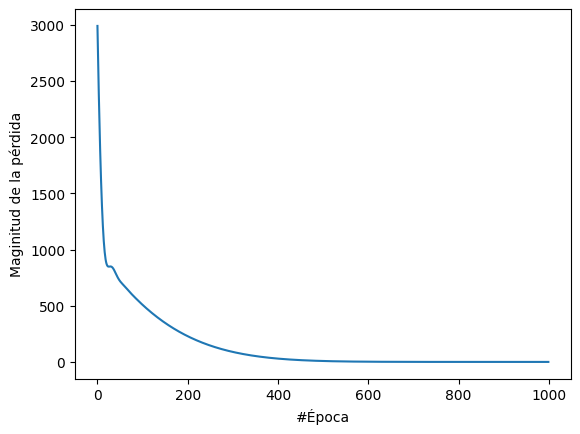

In [7]:
import matplotlib.pyplot as plt

plt.xlabel('#Época')
plt.ylabel('Maginitud de la pérdida')
plt.plot(entremaniento.history['loss'])

In [9]:
import numpy as np

c = 123
# Asegúrate de que el array tenga la forma correcta (1, 1) si el modelo espera una entrada de una sola característica.
entrada = np.array([[c]])
prediccion = modelo.predict(entrada)
print(f'Predicción: {c} celsius son {prediccion[0][0]} fahrenheit')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Predicción: 123 celsius son 253.40145874023438 fahrenheit


In [10]:
print(modelo.layers[0].get_weights())

[array([[1.8002515]], dtype=float32), array([31.970528], dtype=float32)]


La línea anterior son las capas de la red neuronal, en este caso solo tiene 1. Funciona así:

Cálculo real para convertir celsisus a fahrenheit es

(C * 1.8) + 32

Es decir, una entrada multiplicada por un peso y se le suma un sesgo.